In [14]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as stats
%matplotlib inline

In [15]:
df = pd.read_csv('european_social_survey.csv')

In [16]:
df['cntry'].unique()

array(['CH', 'CZ', 'DE', 'ES', 'NO', 'SE'], dtype=object)

Did people become less trusting from 2012 to 2014? Compute results for each country in the sample.

In [18]:
print(df.head())

  cntry  idno  year  tvtot  ppltrst  pplfair  pplhlp  happy  sclmeet  sclact  \
0    CH     5     6    3.0      3.0     10.0     5.0    8.0      5.0     4.0   
1    CH    25     6    6.0      5.0      7.0     5.0    9.0      3.0     2.0   
2    CH    26     6    1.0      8.0      8.0     8.0    7.0      6.0     3.0   
3    CH    28     6    4.0      6.0      6.0     7.0   10.0      6.0     2.0   
4    CH    29     6    5.0      6.0      7.0     5.0    8.0      7.0     2.0   

   gndr  agea  partner  
0   2.0  60.0      1.0  
1   2.0  59.0      1.0  
2   1.0  24.0      2.0  
3   2.0  64.0      1.0  
4   2.0  55.0      1.0  


In [25]:
stats2012 = df[df.year ==6][['cntry','ppltrst']].groupby('cntry').mean()
stats2014 = df[df.year ==7][['cntry','ppltrst']].groupby('cntry').mean()

In [28]:
print(stats2012)

        ppltrst
cntry          
CH     5.677878
CZ     4.362519
DE     5.214286
ES     5.114592
NO     6.649315
SE     6.058499


In [29]:
print(stats2014)

        ppltrst
cntry          
CH     5.751617
CZ     4.424658
DE     5.357143
ES     4.895128
NO     6.598630
SE     6.257709


CH, CZ, DE, SE became more trusting from 2012-2014. People became less trusting in ES and NO.

In [30]:
df = df.dropna(axis=0)

In [31]:
for country in df.cntry.unique():
    country_data = df[df.cntry == country]
    print(stats.ttest_ind(country_data[country_data.year == 6].ppltrst,
                          country_data[country_data.year == 7].ppltrst))

Ttest_indResult(statistic=-0.71569747922178162, pvalue=0.47429160029094908)
Ttest_indResult(statistic=0.34075433231518504, pvalue=0.73334793159099765)
Ttest_indResult(statistic=-0.34662131701252841, pvalue=0.73177642737857318)
Ttest_indResult(statistic=2.1000674443244907, pvalue=0.035832041935213631)
Ttest_indResult(statistic=0.51192241811452277, pvalue=0.60878502181319782)
Ttest_indResult(statistic=-2.0268698056063146, pvalue=0.042829363452229798)


Did people become happier from 2012 to 2014? Compute results for each country in the sample.

In [34]:
happy2012 = df[df.year ==6][['cntry','happy']].groupby('cntry').mean()
happy2014 = df[df.year ==7][['cntry','happy']].groupby('cntry').mean()

In [35]:
print(happy2012)

          happy
cntry          
CH     8.083333
CZ     6.790349
DE     7.307692
ES     7.557858
NO     8.252825
SE     7.901048


In [37]:
print(happy2014)

          happy
cntry          
CH     8.142665
CZ     6.922442
DE     7.857143
ES     7.450617
NO     7.919944
SE     7.938870


Overall people became happier in all the countries surveyed.

In [33]:
for country in df.cntry.unique():
    country_data = df[df.cntry == country]
    print(stats.ttest_ind(country_data[country_data.year == 6].happy,
                          country_data[country_data.year == 7].happy))

Ttest_indResult(statistic=-0.81214248832740099, pvalue=0.41684110117700179)
Ttest_indResult(statistic=-1.1592536826704618, pvalue=0.24658245820500238)
Ttest_indResult(statistic=-0.96631754122855895, pvalue=0.34314091287270732)
Ttest_indResult(statistic=1.3750588408504656, pvalue=0.16924771370417369)
Ttest_indResult(statistic=4.1529572059972661, pvalue=3.4778681704487346e-05)
Ttest_indResult(statistic=-0.53727902103263936, pvalue=0.59114423062723875)


Who reported watching more TV in 2012, men or women?

In [46]:
male = df.loc[(df['gndr'] == 1) & (df['year'] == 6), 'tvtot']
female = df.loc[(df['gndr'] == 2) & (df['year'] == 6), 'tvtot']

In [47]:
male = male.dropna(axis=0)
female = female.dropna(axis=0)

In [48]:
male.mean()

3.8592303945445687

In [49]:
female.mean()

3.9053518334985133

In [50]:
stats.ttest_ind(male, female)

Ttest_indResult(statistic=-0.73235521926405578, pvalue=0.46399396461101539)

Females reported watching more TV in 2012 than men.

Who was more likely to believe people were fair in 2012, people living with a partner or people living alone?

In [40]:
partner = df.loc[(df['partner'] == 1) & (df['year'] == 6), 'pplfair']
alone = df.loc[(df['partner'] == 2) & (df['year'] == 6), 'pplfair']

In [42]:
partner.mean()

6.0743509047993705

In [43]:
alone.mean()

5.8659254414650102

In [44]:
stats.ttest_ind(partner, alone)

Ttest_indResult(statistic=3.0430439318464235, pvalue=0.0023569366769392482)

Pick three or four of the countries in the sample and compare how often people met socially in 2014. Are there differences, and if so, which countries stand out?

In [376]:
social = pd.DataFrame()

In [377]:
CH = df.loc[(df['cntry'] == 'CH') & (df['year'] == 7), 'sclmeet']
SE = df.loc[(df['cntry'] == 'SE') & (df['year'] == 7), 'sclmeet']
NO = df.loc[(df['cntry'] == 'NO') & (df['year'] == 7), 'sclmeet']

In [378]:
temp_CH = CH.append(pd.Series(np.repeat(-1, 136)))
temp_CH = temp_CH.reset_index(drop=True)
temp_NO = NO.append(pd.Series(np.repeat(-1, 177)))
temp_NO = temp_NO.reset_index(drop=True)
SE = SE.reset_index(drop=True)

In [379]:
social['CH'] = temp_CH
social['SE'] = SE
social['NO'] = temp_NO

In [449]:
social.describe()
#On average, people in CH met 4.2x, SE met 5.4x and NO met 4x socially in 2014.

,CH,SE,NO
count,908.000000,908.000000,908.000000
mean,4.237885,5.426211,4.073789
std,2.508776,1.373098,2.775316
min,-1.000000,2.000000,-1.000000
25%,4.000000,4.000000,3.000000
50%,5.000000,6.000000,5.000000
75%,6.000000,7.000000,6.000000
max,7.000000,7.000000,7.000000


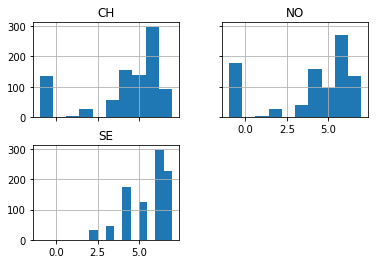

In [380]:
social.hist(sharey=True, sharex=True)
plt.show()

In [365]:
social = social.replace(-1, np.NaN)
social = social[:731]

In [366]:
ranks = stats.rankdata(social['CH'].tolist() + 
                     social['SE'].tolist() + 
                     social['NO'].tolist())

#Add the new ranked variables to the data frame.
social['Ranks_CH'] = ranks[0:731]
social['Ranks_SE'] = ranks[731:1462]
social['Ranks_NO'] = ranks[1462:2193]

In [367]:
#Determine the average rank per group
groups = ['Ranks_CH', 'Ranks_SE', 'Ranks_NO']
print(social[groups].apply(np.mean))

print(np.mean(ranks))

Ranks_CH    1049.682627
Ranks_SE    1129.196990
Ranks_NO    1112.120383
dtype: float64
1097.0


In [368]:
social = social.dropna(axis=0)

In [335]:
#Data does not look normally distributed. Could use Kruskal test.
#Print the test stat followed by probability of getting the result if groups were not different.
stats.kruskal(
    social['CH'], 
    social['SE'], 
    social['NO'])

KruskalResult(statistic=6.9933571326978505, pvalue=0.030297848779941114)

SE differs the most within the group.
With p value <5%, there's evidence against the null hypothesis. Based on the data, how often they meet seem to differ across the countries.

Pick three or four of the countries in the sample and compare how often people took part in social activities, relative to others their age, in 2014. Are there differences, and if so, which countries stand out?

In [398]:
social_activities = pd.DataFrame()

In [399]:
CH_SA = df.loc[(df['cntry'] == 'CH') & (df['year'] == 7), 'sclact']
SE_SA = df.loc[(df['cntry'] == 'SE') & (df['year'] == 7), 'sclact']
NO_SA = df.loc[(df['cntry'] == 'NO') & (df['year'] == 7), 'sclact']

In [400]:
temp_CH_SA = CH_SA.append(pd.Series(np.repeat(-1, 136)))
temp_CH_SA = temp_CH_SA.reset_index(drop=True)
temp_NO_SA = NO_SA.append(pd.Series(np.repeat(-1, 177)))
temp_NO_SA = temp_NO_SA.reset_index(drop=True)
SE_SA = SE_SA.reset_index(drop=True)

In [401]:
social_activities['CH'] = temp_CH_SA
social_activities['SE'] = SE_SA
social_activities['NO'] = temp_NO_SA

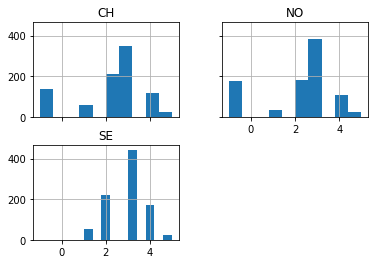

In [402]:
social_activities.hist(sharey=True, sharex=True)
plt.show()

In [404]:
social_activities = social_activities.replace(-1, np.NaN)
social_activities = social_activities[:901]

In [405]:
social_activities = social_activities.dropna(axis=0)

In [414]:
from statsmodels.stats.multicomp import pairwise_tukeyhsd

socially=np.asarray(
    social_activities['CH'].tolist() +
    social_activities['SE'].tolist() +
    social_activities['NO'].tolist())

social_activities_temp = np.array(['CH','SE','NO'])
social_activities_temp = np.repeat(social_activities_temp, 719)

tukey = pairwise_tukeyhsd(endog=socially,                   # Data
                          groups=social_activities_temp,   # Groups
                          alpha=0.05)                     # Significance level

tukey.summary()  

group1,group2,meandiff,lower,upper,reject
CH,NO,0.0904,-0.0176,0.1984,False
CH,SE,0.1057,-0.0023,0.2137,False
NO,SE,0.0153,-0.0927,0.1233,False


Seems there is insufficient evidence to prove that the countries are significantly different in terms of how often they took part in social activities.